# TP2 - Julien Vanbelle

## Imports

In [69]:
import os
import yake
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences
year = 1890

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julienvanbelle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général", "conseil d'administration","conseil supérieur","conseil provincial"])
ignored

{'conseil communal',
 "conseil d'administration",
 'conseil général',
 'conseil provincial',
 'conseil supérieur'}

In [53]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [54]:
# Lister les Fichiers
data_path = "/Users/julienvanbelle/Documents/GitHub/tac/data/txt"
files = os.listdir(data_path)

In [55]:
# Imprimer le nombre de fichiers identifiés
len(files)

2829

In [56]:
# Enlever les fichiers qui ne commencent pas par Bxl_
date_files = [f for f in files if f.startswith('Bxl_1890')]
len(date_files)

22

In [57]:
for f in sorted(date_files):
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())  ##.lower() ==> permet de mettre le texte en miniscule
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1890_Tome_I1_Part_1.txt mentions these keywords: l'administration communale...
Bxl_1890_Tome_I1_Part_2.txt mentions these keywords: travaux manuels, droits acquis, qu'il serait, nouvelle caisse, l'echevin andré...
Bxl_1890_Tome_I1_Part_3.txt mentions these keywords: dépenses ordinaires, tramways bruxellois, conseil académique, arts décoratifs, dépenses extraordinaires...
Bxl_1890_Tome_I1_Part_4.txt mentions these keywords: voie publique, tramways bruxellois...
Bxl_1890_Tome_I1_Part_5.txt mentions these keywords: mètres cubes, mètre cube, d'un terrain, rue nouvelle, mètre carré...
Bxl_1890_Tome_I1_Part_6.txt mentions these keywords: élèves internes, rue neuve, service médical, l'honorable bourgmestre, rue nouvelle...
Bxl_1890_Tome_I1_Part_7.txt mentions these keywords: place rouppe, grande distinction, l'echevin janssen...
Bxl_1890_Tome_I1_Part_8.txt mentions these keywords: élèves internes, service médical, service. art, élèves externes, nommé membre...
Bxl_1890_Tome_I2_Part_1.txt 

In [58]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)

In [60]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in date_files:
    with open(os.path.join(data_path, txt), 'r') as f:
        content_list.append(f.read())

len(content_list)

22

In [62]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '/Users/julienvanbelle/Documents/GitHub/tac/data'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [63]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\n307 —\n\nD. — Canal de Bruxelles au Rupel.\n\nRelevé des diverses recettes effectuées pendant les années 1 8 8 0\nà 1889 et les six premiers mois de l'armée 1890.\n\nPRODUIT\n\nDROIT\n\nA DU CCS.\n\nTOTAL GENERAL.\n\ndes\nDE\n\nNAVIGATION.\n\nd r o i t s de q n i l t a B c e .\n\n1880\n\n535,968\n\n65\n\n1,765\n\n60\n\n357,754\n\n25\n\n1881\n\n3 1 8 , 9 8 8 47\n\n2,080\n\n»\n\n321,068\n\n47\n\n1882\n\n5 1 1 , 7 4 9 34\n\n2,065\n\n10\n\n315,814\n\n44\n\n1883\n\n279,778\n\n03\n\n1,863\n\n60\n\n281,645\n\n65\n\n1884\n\n281,616\n\n46\n\n1,882\n\n80\n\n285,499\n\n26\n\n1885\n\n277,147\n"

In [64]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [65]:
clean_text(year, folder=temp_path)

'Output has been written in /Users/julienvanbelle/Documents/GitHub/tac/data/1890_clean.txt!'

In [66]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'canal bruxelles rupel relevé diverses recettes effectuées années six premiers mois armée produit droit ccs total general navigation six premiers mois entrepôt public ëfal indiquant vins boissons distillées eau vie emmagasinées public douanes années six premiers mois année quantité quantité entrée janvier entrepôt janvier espèce liquide total décembre exercice quantité quantité sortie restant janvier décembre décembre convertis total dernières colonnes hect eau vie étrang indigène hect vinaigre e'

In [67]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('francs', 2746), ('conseil', 1866), ('rue', 1665), ('art', 1612), ('collège', 1431), ('service', 1113), ('bruxelles', 1036), ('gaz', 1022), ('echevin', 1021), ('frais', 823)]


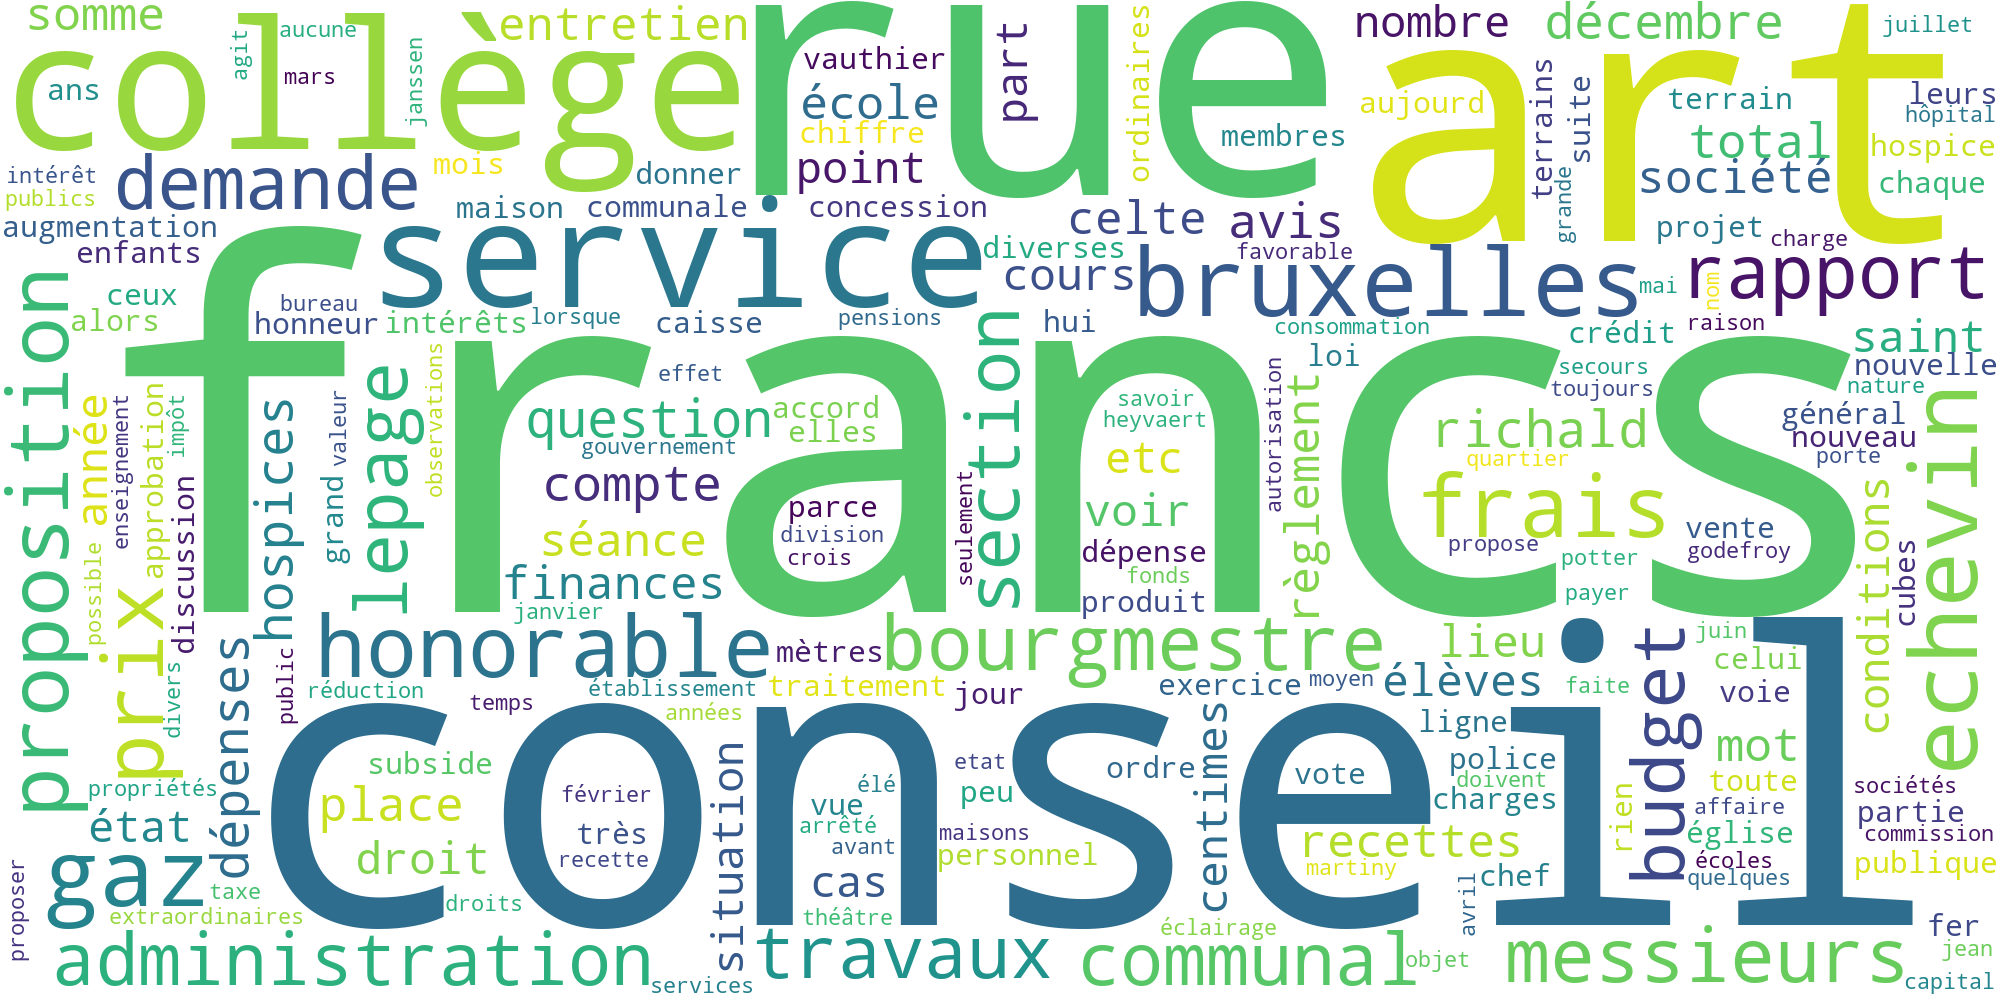

In [68]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

In [70]:
nlp = spacy.load('fr_core_news_md')

In [72]:
# Charger le texte
n=900000
text = open("/Users/julienvanbelle/Documents/GitHub/tac/data/all.txt", encoding='utf-8').read()[:n]

In [73]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 2min 4s, sys: 9.12 s, total: 2min 13s
Wall time: 2min 29s


In [74]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [75]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Gendebien apparait 118 fois dans le corpus
q u i apparait 101 fois dans le corpus
Bortier apparait 75 fois dans le corpus
Bourgmestre apparait 56 fois dans le corpus
Doucet apparait 44 fois dans le corpus
Messieurs apparait 34 fois dans le corpus
Vanderlinden apparait 31 fois dans le corpus
Anspach apparait 30 fois dans le corpus
Doncker apparait 29 fois dans le corpus
M. Bortier apparait 25 fois dans le corpus
Page apparait 25 fois dans le corpus
Cans apparait 24 fois dans le corpus
Fontainas apparait 23 fois dans le corpus
q u ' i apparait 18 fois dans le corpus
échevin Orts apparait 17 fois dans le corpus
j o u r apparait 15 fois dans le corpus
Cluysenaar apparait 15 fois dans le corpus
Schumacher apparait 15 fois dans le corpus
é t a i apparait 10 fois dans le corpus
M. Gendebien apparait 10 fois dans le corpus
M. Cluysenaar apparait 10 fois dans le corpus
M. Blaes apparait 9 fois dans le corpus
M. Ducpetiaux apparait 9 fois dans le corpus
Van Gaver apparait 9 fois dans le corpus
B